# Project 5: Logistic Regression

## A brief review of logistic regression

Consider the training set
 $D = \{ ({\bf x}_{1}, y_1), ({\bf x}_{2}, y_2), \cdots, ({\bf x}_{N}, y_N) \} $, where each  $y_i \in \{0, 1\}$ is the label, and each ${\bf x}_i \in \mathbb{R}^d$ is its corresponding $d$ dimensional feature vector. The goal is to find the linear decision rule
 $$
{\bf w^*}^T {\bf  x}~~ \underset{\omega_0}{\overset{\omega_1}{\gtrless}}~~ 0
~~~~~~~~~~~~~~~~~~~~~~~   (\ddagger) $$
 which is equivalent to
 $$
g_{new,{\bf w}^*}({\bf x}) = \frac{1}{1+e^{-{\bf w^*}^T{\bf x}}}~~~\underset{\omega_0}{\overset{\omega_1}{\gtrless}} ~~~\frac{1}{2}~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
 $$
 such that ${\bf w}^*$ is chosen to minimize the cost function, thus:
 $$
 \begin{align}
 {\bf w^*} & = \underset{\bf w}{argmin} ~~ J({\bf w}) \\
           & = \underset{\bf w}{argmin} ~~\frac{1}{N}\sum_{i=1}^N  C({\bf x}_i , {\bf w})
 \end{align}
 $$
 where
 $$
 C({\bf x}_i , {\bf w}) = -y_i \ln \left(g_{new,{\bf w}}({\bf x}_i) \right)-(1-y_i) \ln \left( 1- g_{new,{\bf w}}({\bf x}_i) \right)~.
 $$

To solve this problem we have to take the gradient with respect to ${\bf w}$. We can show that this derivative can be written as

$$
\nabla_{\bf w} J({\bf w}) = \frac{1}{N}\sum_{i=1}^N
                            \left(
                                \left(
                                 g_{new,{\bf w}}({\bf x}_i) - y_i
                                \right)
                                {\bf x}_i
                             \right)
$$, where $g_{new,{\bf w}}({\bf x}_i) \in [0,1]$ interval, and $y_i \in \{0,1\}$ (set of two elements).

As we studied in the lecture, since $J({\bf w})$ is a convex function, then using the Gradient Descent algorithm with a suitable step size will lead us to the optimal value fo ${\bf w}$. In other words, we can use the following algorithm: define a very small threshold we will use to detect convergence, $\epsilon$, and follow these steps:

### Gradient Descent Algorithm

1. Initialize ${\bf w}_0$
1. Set $t = 0$
2. while "not converged", keep doing the following
    1. find $\nabla_{\bf w} J({\bf w})$
    2. set ${\bf w}_{t+1}= {\bf w}_t - \alpha \nabla_w J({\bf w})$
    3. set $~~t = t +1$
    4. test
    $
    ||{\bf w}_{t+1} - {\bf w}_t ||\underset{converged}{\overset{not~ converged }{\gtrless}}\epsilon
    $       

We know that the learning rate, $\alpha$ (or sometimes denoted $\eta$ in our lecture), should be proportional to $\nabla_{{\bf x}} J$, however, for the purposes of this task, we will simply set it to some suitable value. Once the iteration converges, we choose our optimal ${\bf w}^*={\bf w}_{t+1}$

# <u>Here is an example of gradient descent using the MMSE cost function</u>

The purpose of this section is to provide a sample solution that helps to form the solution for this project.

We follow the same methodology that we presented for logistic regression, but here we use a minimum mean square error cost instead of the logistic regression cost. In other words we have:

$$
 J_Q({\bf w}) = \frac{1}{N}\sum_{i=1}^N  
                                \left(
                                 {\bf w}^T{\bf x}_i - y_i
                                \right)^2 ~~~~~~~~~~~(\star)
$$

and in this case the gradient is
$$
\nabla_{\bf w} J_Q({\bf w}) = \frac{1}{N}\sum_{i=1}^N
                                \left(
                                 {\bf w}^T{\bf x}_i - y_i
                                \right) {\bf x}_i ~~~~ (\dagger)
$$

We follow the same gradient descent method to solve for the optimal ${\bf w}$:
 $$
 \begin{align}
 {\bf w^*} & = \underset{\bf w}{argmin} ~~ J_Q({\bf w}) \\
 \end{align}
 $$   

The gradient descent algorithm is:
<ol type = "1">
<li> Initialize ${\bf w}_0$                         </li>
<li> Set  $t = 0$                                   </li>
<li> while "not converged", keep doing the following:</li>
   <ol type = "A">
   <li> find $\nabla_{\bf w} J({\bf w})$                            </li>
   <li> set ${\bf w}_{t+1} = {\bf w}_t - \alpha {\nabla} J({\bf w})$</li>
   <li> set $t = t +1$                                              </li>
   <li> test $||{\bf w}_{t+1} - {\bf w}_t ||\underset{converged}{\overset{not converged }{\gtrless}}\epsilon$  </li>
   </ol>
</ol>

## The following is an example of code to find ${\bf w}^*$ with MMSE cost
You are welcome to use this code.

The following code generates the training data:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
N = 1000                 # total number of training points to be created
X, y = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std= 1,random_state=1001)   # each instance will have 2 features
X = np.transpose(X)      # matrix of dimensions 2xN holding the two features of each instance

This next code visualizes the data. You are not required to use this data.

Text(0.5, 1.0, 'Two blobs of training instances')

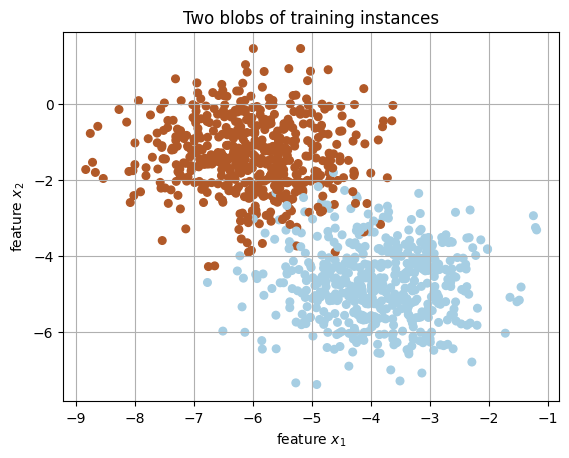

In [ ]:
plt.scatter(X[0, :], X[1, :], c=y, s=30, cmap=plt.cm.Paired)  # We've seen this code in previous projects
plt.grid()
plt.xlabel('feature $x_1$')
plt.ylabel('feature $x_2$')
plt.title('Two blobs of training instances')

**Without further looking at the data we set aside 20% of the data as test data. The rest is used as training data:**

In [ ]:
N_tr = int(N*0.8)                # Number of training instances
N_tst = N-N_tr                   # Number of testing instances
x_tr = X[:, 0:N_tr]              # copy the first N_tr instances' features to x_tr
x_tr = np.vstack((np.ones(N_tr), x_tr)) # attach a first row of 1s, which are the bias terms of x
y_tr = np.transpose(y[0:N_tr])   # copy the first N_tr instances' labels to y_tr
x_tst= X[:, N_tr:]               # copy the remaining instances' features to x_tst
x_tst = np.vstack((np.ones(N_tst), x_tst)) # attach a first row of 1s, which are the bias terms of x
y_tst = np.transpose(y[N_tr:])   # copy the remaining instances' labels to y_tst

So, the matrix of training features now contains:
$$
x_{tr}:=\left[
{\bf x}^{(0)}~~ {\bf x}^{(1)}~~ {\bf x}^{(3)}~~\cdots ~~{\bf x}^{(N_{tr})}
\right]  
$$ and each feature vector is
$$
{\bf x}^{(i)}=\left[
\begin{array}{c}
x^{(i)}_0 \\
x^{(i)}_1 \\
x^{(i)}_2
\end{array}
  \right]
$$
**Now we use the gradient descent algorithm to find ${\bf w^*}$ using only the training data**

In [ ]:
epsilon = 1e-4                                # Select a very small epsilon to test for convergence
d = np.shape(x_tr)[0]                         # d = number of features + 1 (for the bias term)
w = np.zeros([d,1])                           # here is (A.)

In [ ]:
alpha = 0.1                                  # This is our learning rate
J_Q_along_iterations = []                     # This array keeps track of the cost with the training data for each iteration
E_test = []                                   # This array keeps track of the cost with the testing data for each iteration
Convergence_flag = 1                          # while this flag is 1, the loop with continue to iterate
while Convergence_flag:
  gradient = 1/N_tr * np.sum((x_tr * (np.matmul(np.transpose(w), x_tr ) - y_tr)), axis=1) # here is (B.) using the equation (dagger) above
  gradient = gradient.reshape(d,1)
  w_new = w  - alpha*gradient                 # here is (C.)
  if np.linalg.norm(w_new-w) <= epsilon:      # here is (D.)
    Convergence_flag = 0                      # if two consecutive estimates of w* are very close, then finish the loop
  w = 1.0 * w_new
  J_Q_sizeN = np.square(np.matmul(np.transpose(w), x_tr ) - y_tr)  # We now calculate the cost using the (star) formula above for the training data
  J_Q = 1/N_tr * np.sum(J_Q_sizeN)            # This is (star) for this step of the iteration with the training data
  J_Q_along_iterations = np.append(J_Q_along_iterations, J_Q )     # This array keeps track of the cost for each iteration using the training data
  E_ts = 1/N_tst * np.sum(np.square((np.matmul(np.transpose(w), x_tst ) - y_tst))) # This is (star) for this step of the iteration with the testing data
  E_test = np.append(E_test, E_ts )                                # This array keeps track of the cost for each iteration using the testing data
plt.figure()
plt.plot(J_Q_along_iterations, label='cost training data')
plt.plot(E_test, label='cost test data' )
plt.legend()
plt.grid()
plt.title('Cost for Training set and cost for testing set, as a function of iteration number')
plt.xlabel('iteration number')
plt.ylabel('cost')

KeyboardInterrupt: ignored

In [ ]:
gradient


array([[nan],
       [nan],
       [nan]])

**Next, we draw a line using  our newly found, optimal ${\bf w}^*$ to divide the feature space into the two decision regions.**
The boundary that segments the feature space into two decision regions using MMSE is selecting the label, $0$ or $1$, that minimizes the squared error:
$$
\begin{align}
({\bf w^*}^T {\bf  x}-0)^2
&\underset{\omega_0}{\overset{\omega_1}{\gtrless}}
({\bf w^*}^T {\bf  x} -1)^2 \\
({\bf w^*}^T {\bf  x})^2
&\underset{\omega_0}{\overset{\omega_1}{\gtrless}}
({\bf w^*}^T {\bf  x})^2 -2{\bf w^*}^T {\bf  x}+1 \\
{\bf w^*}^T {\bf  x}
&\underset{\omega_0}{\overset{\omega_1}{\gtrless}}
\frac{1}{2}
\end{align}
$$ And the boundary line is the line of features that satisfy
$
{\bf w^*}^T {\bf  x} =\frac{1}{2}
$, which is equivalent to where
$$
\begin{align}
\left[\begin{array}{c c c}
w_0 & w_1 & w_2 \end{array}\right] \cdot
\left[\begin{array}{c}
1 \\
x_1 \\
x_2 \end{array}\right]&=\frac{1}{2} \\
w_0+w_1 x_1 + w_2x_2 &=\frac{1}{2}\\
x_2 &= \frac{-w_1}{w_2} x_1+\frac{(\frac{1}{2}-w_0)}{w_2}~~~~(\clubsuit)
\end{align}
$$ This formula, $(\clubsuit)$, allows us to graph the boundary line in the feature space.

In [ ]:
plt.scatter(X[0, :], X[1, :], c=y, s=30, cmap=plt.cm.Paired)
xx = np.linspace(np.min(X[0, :]),np.max(X[0, :]),100)    # We'll use 100 points to graph the boundary line
yy = -w[1]/w[2]*xx + (0.5 - w[0])/w[2]                   # This is the line equation from the clubsuit equation above.
plt.plot(xx,yy)
plt.grid()
plt.xlabel('feature $x_1$')
plt.ylabel('feature $x_2$')
plt.title('Both training and testing instances with the boundary in place')

This is the end of the example.

***
***

# Problem 1 [5 points]
Use the data set given below to classify the data with the following characteristics

*   Cost function: Logistic regression (not MMSE, like the example provided above)
*   method for finding the minimum: Gradient Descent

Remember to set asside 20% of your data as test data.

The output of your program should provide the following:


1.   [1 point] Optimial classifier weight vector ${\bf w}^*$
2.   [1 point] A plot of the data divided into decision regions similar to the one that is presented above
3.   [1 point] A plot of the logistic regression cost for training and test data as a function of iteration number, like the one provided in the example above
4.   [1 point] A plot of the quadratic loss function ($\star$ above) for training and test data as a function of iteration number
5.   [1 point] You observe that the quadratic and logistic loss function are different. Change the parameter  ```random_state=1001``` in the code above both for the logistic regression that you solved and the quadratic solution that is provided in this project. See how the loss changes and how the classification regions change. What can you say about the difference between these two classifiers?




In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
N = 4000
X, y = make_blobs(n_samples=N, n_features=2, centers=2, cluster_std= 1,random_state=1001)
X = np.transpose(X)

### Next code visualizes the data
You are welcome to use this code. You are not required to use this data.

In [ ]:
plt.scatter(X[0, :], X[1, :], c=y, s=30, cmap=plt.cm.Paired)
plt.grid()
plt.xlabel('feature $x_1$')
plt.ylabel('feature $x_2$')
plt.title('Two blobs of features colored by their labels')

In [ ]:
N_tr = int(N*0.8)                # Number of training instances
N_tst = N-N_tr                   # Number of testing instances
x_tr = X[:, 0:N_tr]              # copy the first N_tr instances' features to x_tr
x_tr = np.vstack((np.ones(N_tr), x_tr)) # attach a first row of 1s, which are the bias terms of x
y_tr = np.transpose(y[0:N_tr])   # copy the first N_tr instances' labels to y_tr
x_tst= X[:, N_tr:]               # copy the remaining instances' features to x_tst
x_tst = np.vstack((np.ones(N_tst), x_tst)) # attach a first row of 1s, which are the bias terms of x
y_tst = np.transpose(y[N_tr:])   # copy the remaining instances' labels to y_tst

In [ ]:
epsilon = 1e-4                                # Select a very small epsilon to test for convergence
d = np.shape(x_tr)[0]                         # d = number of features + 1 (for the bias term)
w = 2*np.zeros([d,1])                           # here is (A.)

In [ ]:
alpha = 0.1                                  # This is our learning rate
J_Q_along_iterations = []                     # This array keeps track of the cost with the training data for each iteration
E_test = []                                   # This array keeps track of the cost with the testing data for each iteration
Convergence_flag = 1                          # while this flag is 1, the loop with continue to iterate
while Convergence_flag:
  gradient = 1/N_tr * np.sum(x_tr * (1/(1 + np.exp(-np.matmul(np.transpose(w), x_tr ))) - y_tr), axis=1) # here is (B.) using the equation (dagger) above
  gradient = gradient.reshape(d,1)
  w_new = w  - alpha*gradient                 # here is (C.)
  if np.linalg.norm(w_new-w) <= epsilon:      # here is (D.)
    Convergence_flag = 0                      # if two consecutive estimates of w* are very close, then finish the loop
  w = 1.0 * w_new
  J_Q_sizeN = y_tr * np.log(1/(1 + np.exp(-np.matmul(np.transpose(w), x_tr)))) + (1-y_tr)*np.log(1-(1 / (1 + np.exp(-np.matmul(np.transpose(w), x_tr)))))  # We now calculate the cost using the (star) formula above for the training data
  J_Q = -1/N_tr * np.sum(J_Q_sizeN)            # This is (star) for this step of the iteration with the training data
  J_Q_along_iterations = np.append(J_Q_along_iterations, J_Q )     # This array keeps track of the cost for each iteration using the training data
  E_ts = -1/N_tst * np.sum(y_tst * np.log(1 / (1 + np.exp(-np.matmul(np.transpose(w), x_tst)))) + (1-y_tst)*np.log(1-(1 / (1 + np.exp(-np.matmul(np.transpose(w), x_tst)))))) # This is (star) for this step of the iteration with the testing data
  E_test = np.append(E_test, E_ts )                                # This array keeps track of the cost for each iteration using the testing data


In [ ]:
# problem 1, optimal w
# optimal classifier weight vector w*
print(w)

In [ ]:
# problem 2, decision boundary
plt.scatter(X[0, :], X[1, :], c=y, s=30, cmap=plt.cm.Paired)
xx = np.linspace(np.min(X[0, :]),np.max(X[0, :]),100)    # We'll use 100 points to graph the boundary line
yy = -w[1]/w[2]*xx + (0.5 - w[0])/w[2]                   # This is the line equation from the clubsuit equation above.
plt.plot(xx,yy)
plt.grid()
plt.xlabel('feature $x_1$')
plt.ylabel('feature $x_2$')
plt.title('Both training and testing instances with the boundary in place')

In [ ]:
# problem 3, cost curve
plt.figure()
plt.plot(J_Q_along_iterations, label='cost training data')
plt.plot(E_test, label='cost test data' )
plt.legend()
plt.grid()
plt.title('Cost for Training set and cost for testing set, as a function of iteration number')
plt.xlabel('iteration number')
plt.ylabel('cost')

In [ ]:
# problem 4, quadratic cost function and its plot
alpha = 0.01                                  # This is our learning rate
J_Q_along_iterations = []                     # This array keeps track of the cost with the training data for each iteration
E_test = []                                   # This array keeps track of the cost with the testing data for each iteration
Convergence_flag = 1                          # while this flag is 1, the loop with continue to iterate
while Convergence_flag:
  gradient =  1/N_tr * np.sum(x_tr * (1 / (1 + np.exp(-np.matmul(np.transpose(w), x_tr ))) - y_tr), axis=1) # here is (B.) using the equation (dagger) above
  gradient = gradient.reshape(d,1)
  w_new = w  - alpha*gradient                 # here is (C.)
  if np.linalg.norm(w_new-w) <= epsilon:      # here is (D.)
    Convergence_flag = 0                      # if two consecutive estimates of w* are very close, then finish the loop
  w = 1.0 * w_new
  J_Q_sizeN = np.square(np.matmul(np.transpose(w), x_tr ) - y_tr)  # We now calculate the cost using the (star) formula above for the training data
  J_Q = 1/N_tr * np.sum(J_Q_sizeN)            # This is (star) for this step of the iteration with the training data
  J_Q_along_iterations = np.append(J_Q_along_iterations, J_Q )     # This array keeps track of the cost for each iteration using the training data
  E_ts = 1/N_tst * np.sum(np.square((np.matmul(np.transpose(w), x_tst ) - y_tst))) # This is (star) for this step of the iteration with the testing data
  E_test = np.append(E_test, E_ts )                                # This array keeps track of the cost for each iteration using the testing data
plt.figure()
plt.plot(J_Q_along_iterations, label='cost training data')
plt.plot(E_test, label='cost test data' )
plt.legend()
plt.grid()
plt.title('Cost for Training set and cost for testing set, as a function of iteration number')
plt.xlabel('iteration number')
plt.ylabel('cost')

In [ ]:
# problem 5
# As I change the random state, I observed that:
# a) for quadratic function, the cost starts with relatively higher value, but takes shorter literations to achieve the desired goal.
# b) for logistic regression classifier, the cost value starts lower, but it takes more iterations to reach the bottom of the valley.